# Introduction
Hope you're reading this in <font color = 'orange'>Google Colab</font>.

Training a neural network model was tough work, and while we did well we should take the chance to use classical machine learning to see if we can achieve the same performance.

In this Part IV, we will:
1. Install scikit-image
2. Derive local binary patterns from one image using scikit-image
3. Derive local binary patterns from all images
4. Create a DataFrame containing each image's LBP
5. Export the DataFrame into a CSV in Google Drive

### Step 1: Install scikit-image
scikit-image is like scikit-learn, but for images. It contains a suite of methods to extract information from images, and in our case - local binary patterns (LBP).

In short, LBP contains information about an image's texture and the distribution of values found in the image can be used a training data for machine learning. 

It's usually used in facial recognition, but the author hypothesized that there are changes in the tea's image texture during different parts of the fermentation and sought LBP out. 

More readings:
1. https://towardsdatascience.com/face-recognition-how-lbph-works-90ec258c3d6b
2. https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html

In [1]:
# Step 1: Install scikit-image
!pip install scikit-image

## Test LBP extraction on a single image
Before we do LBP extract on all of the images, let's give LBP a try on a single image.

We will aim to:
1. select one image
2. turn it greyscale
3. extract the local binary pattern
4. flatten the resulting array
5. normalize the values
6. plot a histogram
7. extract the binned histogram values

If all goes well, this is what you'll see for Steps 1-6:

![LBPExtraction](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectTeaFermentation/LBPExtractionProcess.png)


### Step 2: Import libraries
We'll need to import:
1. local_binary_pattern from skimage.features
2. cv2
3. matplotlib.pyplot as plt
4. matplotlib.image as mpimg
5. numpy as np

In [2]:
# Step 2: Import the libraries
from skimage.feature import local_binary_pattern
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Step 3: Select the path of a random image in your dataset
Remember we told you not to delete the original folders in your Google Drive after splitting? Pick a random image in any of the <strong>original</strong> three tea folders. 

Any one of them works, since we just want to test it.

Declare a variable to store that path.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Step 3: Get the path of a random image in your dataset
path='/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/fermented_0.png'

### Step 4: Visualize the image
We'll be using the matplotlib.image library to visualize the library.

<strong>Hint: Google "matplotlib visualize image"</strong>

[[[0.59607846 0.4509804  0.16470589 1.        ]
  [0.6039216  0.4627451  0.17254902 1.        ]
  [0.54901963 0.43529412 0.15686275 1.        ]
  ...
  [0.58431375 0.46666667 0.16078432 0.99607843]
  [0.6039216  0.4627451  0.15686275 0.99607843]
  [0.57254905 0.44705883 0.15686275 0.99607843]]

 [[0.54509807 0.43137255 0.15686275 1.        ]
  [0.5921569  0.4509804  0.15294118 1.        ]
  [0.59607846 0.47058824 0.15686275 1.        ]
  ...
  [0.5882353  0.47058824 0.16078432 1.        ]
  [0.6        0.46666667 0.16078432 1.        ]
  [0.5882353  0.4627451  0.17254902 1.        ]]

 [[0.52156866 0.4117647  0.15686275 1.        ]
  [0.5686275  0.4509804  0.17254902 1.        ]
  [0.5921569  0.47058824 0.16470589 1.        ]
  ...
  [0.58431375 0.45882353 0.16470589 1.        ]
  [0.5686275  0.44313726 0.14901961 1.        ]
  [0.54509807 0.42745098 0.14117648 1.        ]]

 ...

 [[0.47058824 0.37254903 0.1254902  1.        ]
  [0.44313726 0.3372549  0.10196079 1.        ]
  [0.45098

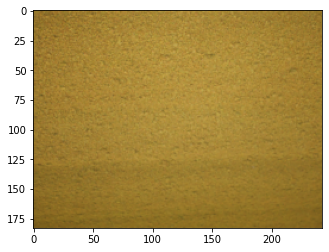

In [5]:
# Step 4: Visualize the image you've chosen
img = mpimg.imread(path)
print(img)
plt.imshow(img)
plt.show()

### Step 5: Convert the image to greyscale and vizualize it
Use cv2 library to convert your image to greyscale, and then use matplotlib.image library to image it. 

That said, there are a few ways to image your grayscaled image, including cv2 itself. Try different methods to display your image. 

<font color = 'red'>Just make sure you have your image converted to gray scale using cv2.</font>

Note: When you use imshow from matplotlib library, make sure your cmap parameter has 'gray' in it. Otherwise you'll get a fake color image.

In [6]:
# Step 5a: Convert your image into grayscale and save it in a variable
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[0.3819255 , 0.3920706 , 0.36500788, ..., 0.38861963, 0.38738042,
        0.3745961 ],
       [0.36225885, 0.3779608 , 0.39109024, ..., 0.39136866, 0.39040786,
        0.3902824 ],
       [0.3480667 , 0.3811412 , 0.39298826, ..., 0.38518825, 0.36950198,
        0.3552667 ],
       ...,
       [0.30985492, 0.27897257, 0.28216866, ..., 0.3051412 , 0.30833727,
        0.3081255 ],
       [0.30083922, 0.282     , 0.29870588, ..., 0.3113647 , 0.31686276,
        0.32033727],
       [0.29433727, 0.29825884, 0.29825884, ..., 0.30974513, 0.31091768,
        0.31528628]], dtype=float32)

In [7]:
img.shape

(183, 243, 4)

In [8]:
gray.shape

(183, 243)

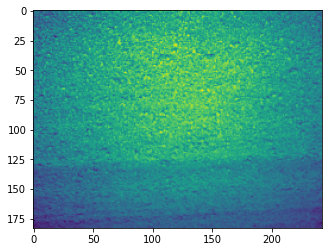

In [9]:
# Step 5b: Visualize the grayscale image
plt.imshow(gray)
plt.show()

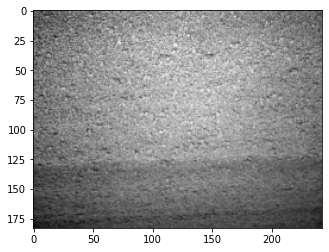

In [10]:
plt.imshow(gray, cmap='gray')
plt.show()

### Step 6: Perform local binary pattern extraction from your image in Step 5
We will then extract the local binary pattern from the grayscale image using the local_binary_pattern function.

Save the results into a variable.

Here are the parameters you should take note of as well:
1. n_points - 8
2. radius - 3

When you've extracted the LBP, you will get an array that is something like this (this is just an example):

![LBPArrayExample](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectTeaFermentation/LBPArrayExample.png)

The .shape of the array is (183, 243).

<strong>Hint: The documentation for local_binary_pattern will help you.</strong>

In [11]:
# Step 6: Get the LBP of the grayscale image from Step 5
lbp=local_binary_pattern(gray, 8, 3)
lbp

array([[129., 128., 192., ...,   0.,  16., 112.],
       [129., 193.,   0., ...,  16.,   0.,   0.],
       [129., 129.,   0., ...,  80., 112., 112.],
       ...,
       [  4.,   7.,   7., ...,  28.,  28.,  12.],
       [  4.,   7.,   3., ...,  24.,   0.,   0.],
       [  5.,   6.,   2., ...,  24.,   0.,   0.]])

### Step 7: Flatten your array using .ravel() for normalization
Currently, the array is 183 x 243. However, if you're going to plot the distribution of values in a histogram, you'll need two things:
1. Flatten the array into a 1D array of length 44469 (183 times 243)
2. Divide all items in the 1D array by the max value for normalization

Here's what we expect to see:

![TransformingDataForHistogram](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectTeaFermentation/TransformingDataForHistogram.png)

In [12]:
# Step 7a: Use the .ravel() method on the array you got from Step 6
flatten=lbp.ravel()
flatten.shape

(44469,)

In [13]:
# Step 7b: Divide the resulting array with the largest value in the array
normalize=flatten/max(flatten)
normalize

array([0.50588235, 0.50196078, 0.75294118, ..., 0.09411765, 0.        ,
       0.        ])

### Step 8: Plot your normalized array in a histogram
Plot your array in a histogram to see something like the LBP histogram above.

Make sure you have 20 bins as well.

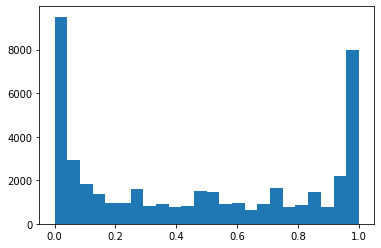

In [14]:
# Step 8: Plot a histogram using your normalized 1D array
plt.hist(normalize, bins=24)
plt.show()

### Step 9: Use numpy.histogram() to get the histogram data
Currently, we have a 1D array of length 44469. However, what the histogram was good at was binning the the values into buckets.

We will next want to retrieve the relative frequency of the bins as a feature to build our DataFrame. The reason is because the frequencies of the normalized LBPs are presumably distinct for different tea fermentation levels. 

![NormalizedHistogramFrequency](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectTeaFermentation/NormalizedHistogramFrequency.png)

What we need to do next is to:
1. Use numpy.histogram() to get the frequency of the 20-bin values 
2. Take only the frequency of the bins
3. Normalize the frequency of the bins 

In [15]:
# Step 9: Get the normalized frequency of the histogram
Freq=np.histogram(normalize, bins=20)[0]
NormalFreq=Freq/max(Freq)
NormalFreq

array([1.        , 0.31209167, 0.23158106, 0.10795055, 0.11528797,
       0.17408785, 0.10151774, 0.10634235, 0.1028244 , 0.16021711,
       0.16082018, 0.11217208, 0.09830134, 0.10272389, 0.17569605,
       0.08915469, 0.1067444 , 0.15800583, 0.23037491, 0.82380139])

## Perform LBP extraction on the entire dataset
Now that you've practised performing LBP extraction on one single image, you'll have to repeat Steps 5-9 for the entire image dataset. 

Once we have a list of the normalized frequencies of the LBP patterns, we can then turn the entire list of arrays into a DataFrame. 

![ListOfArraysToDataFrame](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectTeaFermentation/ListOfArraysToDataFrame.png)

### Step 10: Create a list of paths
We will create a list of paths to the images in all three folders in 'Black tea fermentation dataset', i.e. 'fermented tea', 'overfermented tea', and 'underfermented tea'.

There are a few ways to do it, but ultimately you want a list containing 6,000 paths to each of the images in the folders, i.e. each string in the list should end with a ".png".

<strong>Hint: Google "get list of all files in directory python"</strong>

In [16]:
# Step 10: Create a list of paths
import glob
FermentedPath=glob.glob('/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/*.png')
FermentedLen=len(FermentedPath)
print(f"Total Fermented Images: {FermentedLen}")
OverfermentedPath=glob.glob('/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/overfermented tea/*.png')
OverfermentedLen=len(OverfermentedPath)
print(f"Total Overfermented Images: {OverfermentedLen}")
UnderfermentedPath=glob.glob('/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/underfermented tea/*.png')
UnderfermentedLen=len(UnderfermentedPath)
print(f"Total Underfermented Images: {UnderfermentedLen}")

All = FermentedPath+OverfermentedPath+UnderfermentedPath
All

Total Fermented Images: 2000
Total Overfermented Images: 2000
Total Underfermented Images: 2000


['/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/fermented_995.png',
 '/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/fermented_1003.png',
 '/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/fermented_1001.png',
 '/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/fermented_1004.png',
 '/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/fermented_1000.png',
 '/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/fermented_1002.png',
 '/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/fermented_1005.png',
 '/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation dataset/fermented tea/fermented_1008.png',
 '/content/drive/MyDrive/Project Tea Fermentation/Black tea fermentation 

### Step 11: Loop through each path and repeat Steps 5-9
Now that you have a list of paths, you can now create a list containing the normalized frequency of the LBP for each image. 

In summary, you will need to:
1. Create two empty lists:
    - one list to store the normalized frequency of LBP
    - one list to store the labels of the tea. We will follow the same classes as Part III Step 4
2. Use a for loop to loop through the list of path
3. In each loop:
    - append the corresponding label into the list of labels
    - convert the image into greyscale
    - extract the local binary pattern values from the greyscale image
    - flatten the LBP array
    - use numpy.histogram() to extract the frequency of the 20 bins
    - normalize the frequency by dividing the array with the max value in the array
    - append the resulting normalized array into the list of arrays

#### Sanity check
1. The first item in your list of arrays is an array of length 20.
2. The first item in your list of labels is the label that corresponds to your list of image paths.

In [ ]:
# Step 11: Get the LBPs for all of your images
TeaClass = {'underfermented tea':0, 'overfermented tea':1, 'fermented tea':2}
FreqList=[]
LabelList=[]
for p in All:
  label=TeaClass[p.split('/')[6]]
  LabelList.append(label)
  img=mpimg.imread(p)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  lbp=local_binary_pattern(gray, 8, 3)
  flatten=lbp.ravel()
  normalize=flatten/max(flatten)
  Freq=np.histogram(normalize, bins=20)[0]
  NormalFreq=Freq/max(Freq)
  FreqList.append(NormalFreq)

In [ ]:
print('len of freq list: ', len(FreqList[0]))
print('path: ', All[0], '\nlabel: ', LabelList[0])

In [ ]:
len(FreqList)

### Step 12: Turn the list of arrays into a DataFrame
Let's turn the list of arrays into a DataFrame.

Your resulting DataFrame should have 6,000 rows and 20 columns.

In [ ]:
# Step 12: Turn the list of arrays into a DataFrame
import pandas as pd
FreqDF=pd.DataFrame(FreqList)
FreqDF

### Step 13: Add a new column named 'label'
We'll also add a new column named 'label' using the list of labels that you obtained.

In [ ]:
# Step 13: Add a column called 'label'
FreqDF['label']=LabelList

In [ ]:
FreqDF.shape

### Step 14: Export your DataFrame as a CSV in your Google Drive
Your DataFrame should now have:
1. 6,000 rows
2. 21 columns

Export the DataFrame you prepared into the same folder as your other notebooks.

In [ ]:
# Step 14: Export your DataFrame as CSV
FreqDF.to_csv('/content/drive/MyDrive/Project Tea Fermentation/Frequency v0.1.csv', index=None)

### End of Part IV
There we go, we've successfully extracted the local binary patterns of the images in your dataset and exported the DataFrame into a CSV file. 

Next up in Part V, we will use this CSV for our machine learning to classify the LBP into the different tea fermentation levels.